# Part A: EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load file Leads.csv
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# 1, Data Cleaning

In [5]:
#Convert 'Select' values to NaN.
leads = leads.replace('Select', np.nan)

In [6]:
#Check percentage of null values in each column
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [7]:
#Drop columns with more than 45% missing values
cols = leads.columns
for c in cols:
    if((100*(leads[c].isnull().sum()/len(leads.index))) >= 45):
        leads.drop(c, 1, inplace = True)

In [8]:
#Check percentage of null values in remaining columns
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [9]:
#Check for Prospect ID duplicates
sum(leads.duplicated(subset = 'Prospect ID')) == 0

True

In [10]:
#Check for Lead Number duplicates
sum(leads.duplicated(subset = 'Lead Number')) == 0

True

In [11]:
#Drop Lead Number and Prospect ID since they have all unique values
leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

# 2, Categorical Variables Analysis

In [12]:
# Handle columns with more than 25% missing values (all are categorical variables) 
# Replace missing values with 'Not Specified'
cols = leads.columns
for i in cols:
    if((100*(leads[i].isnull().sum()/len(leads.index))) >= 25):
        leads[i] = leads[i].replace(np.nan,'Not Specified')

In [13]:
#Check value counts of Country column
leads['Country'].value_counts()

India                   6492
Not Specified           2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

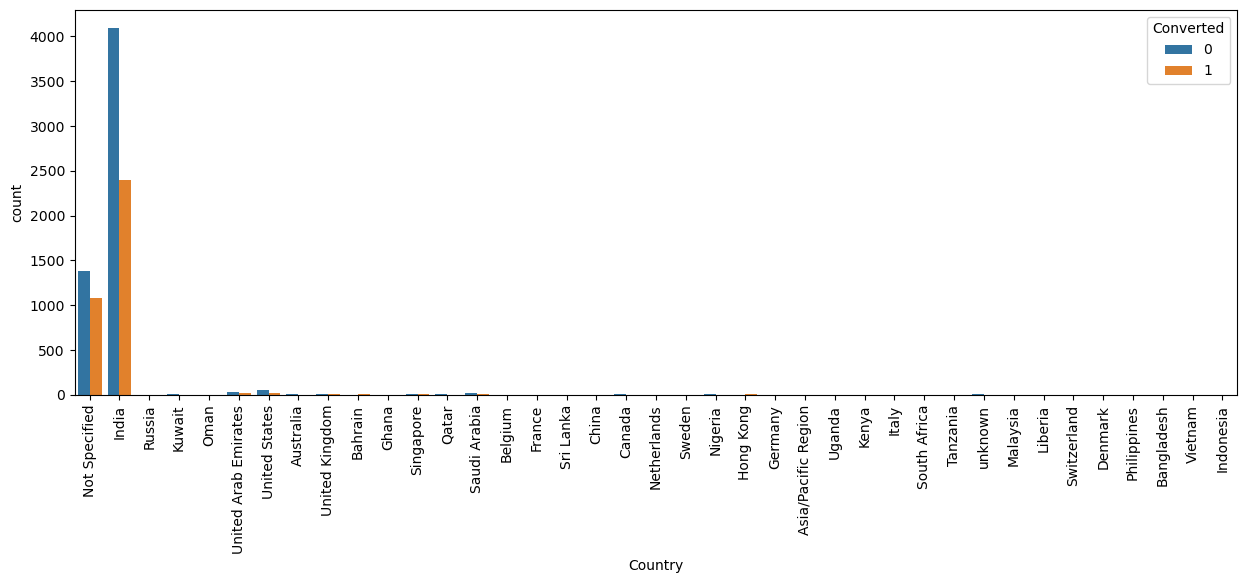

In [14]:
#Visualize in countplot
plt.figure(figsize=(15,5))
country = sns.countplot(x ='Country', data = leads, hue=leads.Converted)
country.set_xticklabels(country.get_xticklabels(), rotation=90)
plt.show()

In [15]:
#Drop Country column because if impute NaN and unknown for India it will account for 97% of the data
leads.drop(['Country'], 1, inplace = True)

In [16]:
#Check value counts of City column
leads['City'].value_counts()

Not Specified                  3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

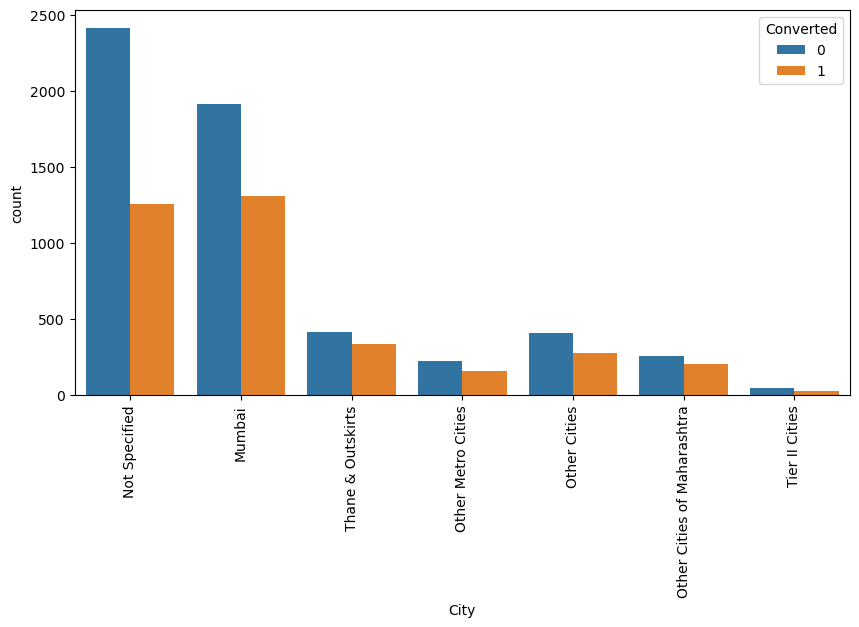

In [17]:
#Visualize in countplot
plt.figure(figsize=(10,5))
city = sns.countplot(x ='City', data = leads, hue=leads.Converted)
city.set_xticklabels(city.get_xticklabels(),rotation=90)
plt.show()

In [18]:
#Check value counts of What is your current occupation column
leads['What is your current occupation'].value_counts()

Unemployed              5600
Not Specified           2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [19]:
#Shorten column name
leads.rename(columns = {'What is your current occupation':'Occupation'}, inplace = True)

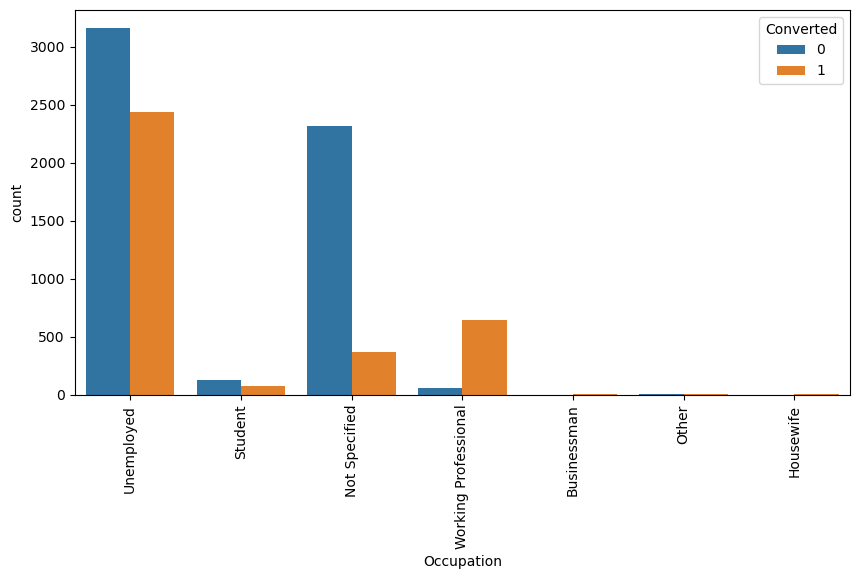

In [20]:
#Visualize in countplot
plt.figure(figsize=(10,5))
occupation = sns.countplot(x ='Occupation', data = leads, hue=leads.Converted)
occupation.set_xticklabels(occupation.get_xticklabels(),rotation=90)
plt.show()

In [21]:
#Check value counts of Specialization column
leads['Specialization'].value_counts()

Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

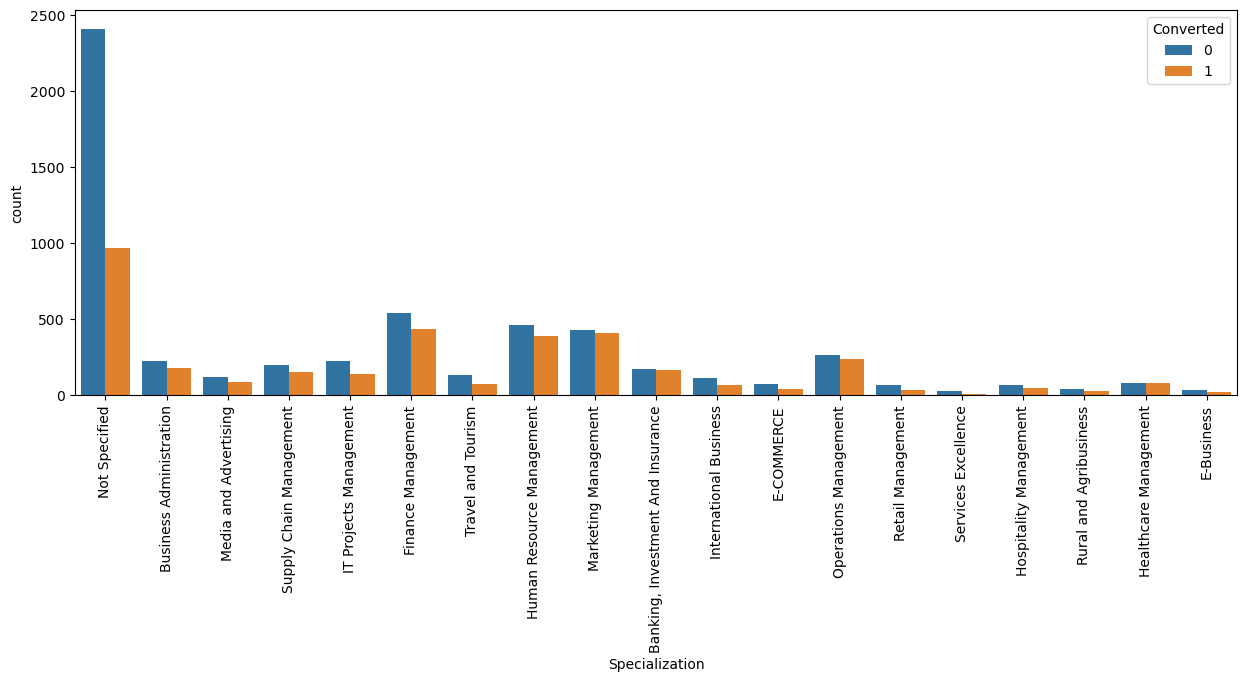

In [22]:
#Visualize in countplot
plt.figure(figsize=(15,5))
specialization = sns.countplot(x ='Specialization', data = leads, hue=leads.Converted)
specialization.set_xticklabels(specialization.get_xticklabels(),rotation=90)
plt.show()

In [23]:
#Check value counts of What matters most to you in choosing a course column
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Not Specified                2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

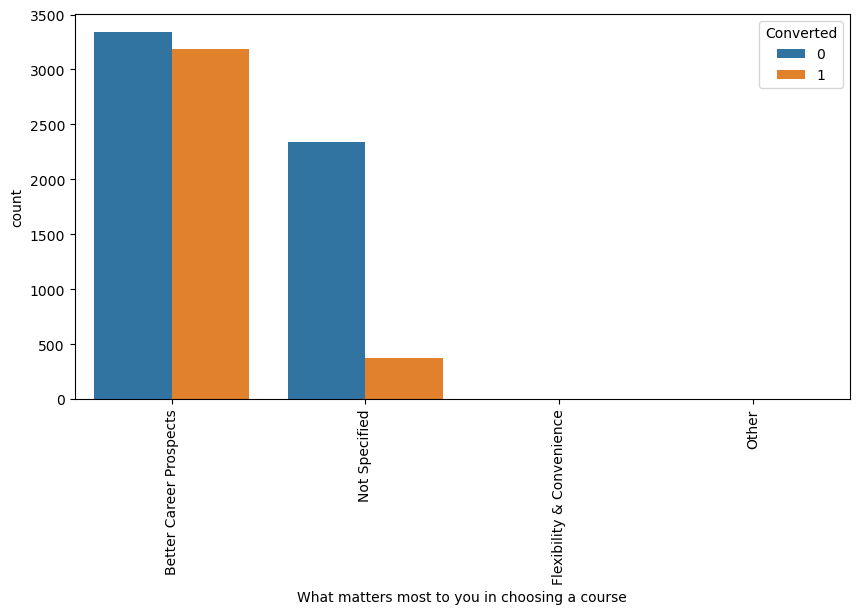

In [24]:
#Visualize in countplot
plt.figure(figsize=(10,5))
motivation = sns.countplot(x ='What matters most to you in choosing a course', data = leads, hue=leads.Converted)
motivation.set_xticklabels(motivation.get_xticklabels(),rotation=90)
plt.show()

In [25]:
#Drop What matters most to you in choosing a course column because if impute NaN for Better Career Prospects 
#it will account for 99.96% of the data
leads.drop(['What matters most to you in choosing a course'], 1, inplace = True)

In [26]:
#Check value counts of Tags column
tag_counts = leads['Tags'].value_counts()
tag_counts

Not Specified                                        3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [27]:
#Replace tags with low frequency with "Others"
tags_to_replace = tag_counts[tag_counts < 500].index.tolist()
leads['Tags'].replace(tags_to_replace, 'Other', inplace = True)

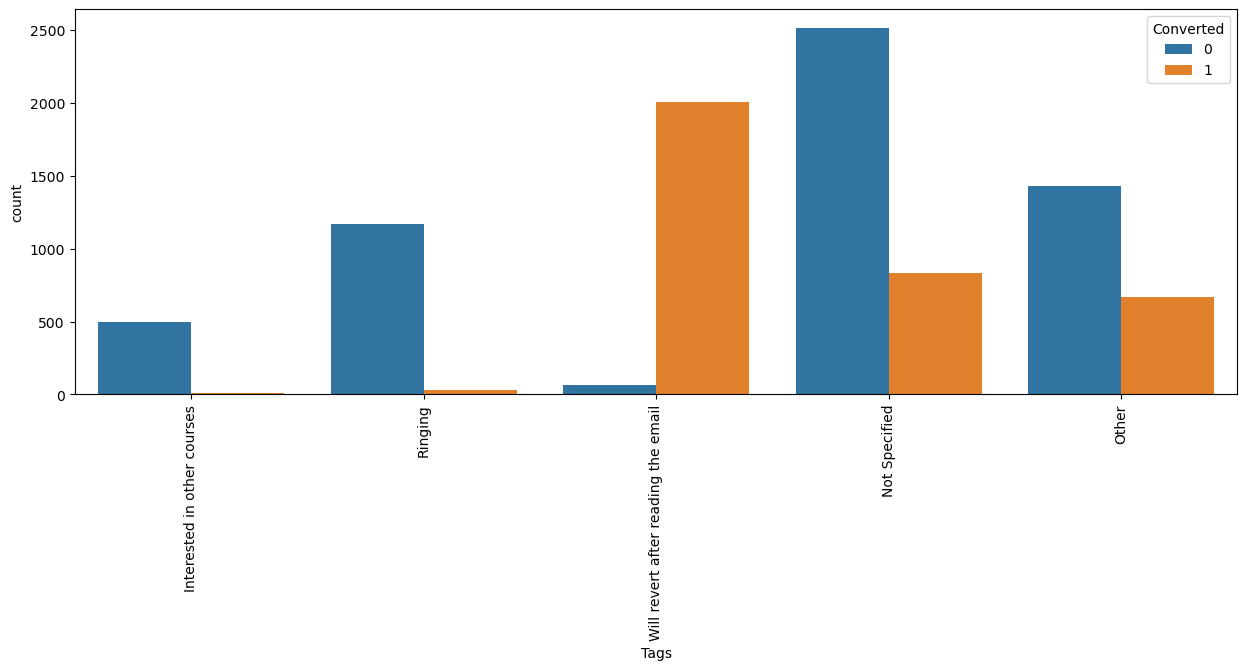

In [28]:
#Visualize in countplot
plt.figure(figsize=(15,5))
tag = sns.countplot(x ='Tags', data = leads, hue=leads.Converted)
tag.set_xticklabels(tag.get_xticklabels(),rotation=90)
plt.show()

In [29]:
#Check percentage of null values in remaining columns
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
Occupation                                  0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                                        0.00
Update me on Supply 

In [30]:
#Handle missing values in Lead Source
#Check value counts of Lead Source column
leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [31]:
#Correct data entry mistakes & Group NaN and sources with low frequency
leads['Lead Source'] = leads['Lead Source'].replace('google', 'Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook', 'Social Media')
leads['Lead Source'] = leads['Lead Source'].replace([np.nan,'bing','Click2call','Live Chat',
                                                     'Press_Release','Pay per Click Ads', 'blog',
                                                     'WeLearn','welearnblog_Home','youtubechannel',
                                                     'testone','NC_EDM'], 'Other')
leads['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Other                 57
Name: Lead Source, dtype: int64

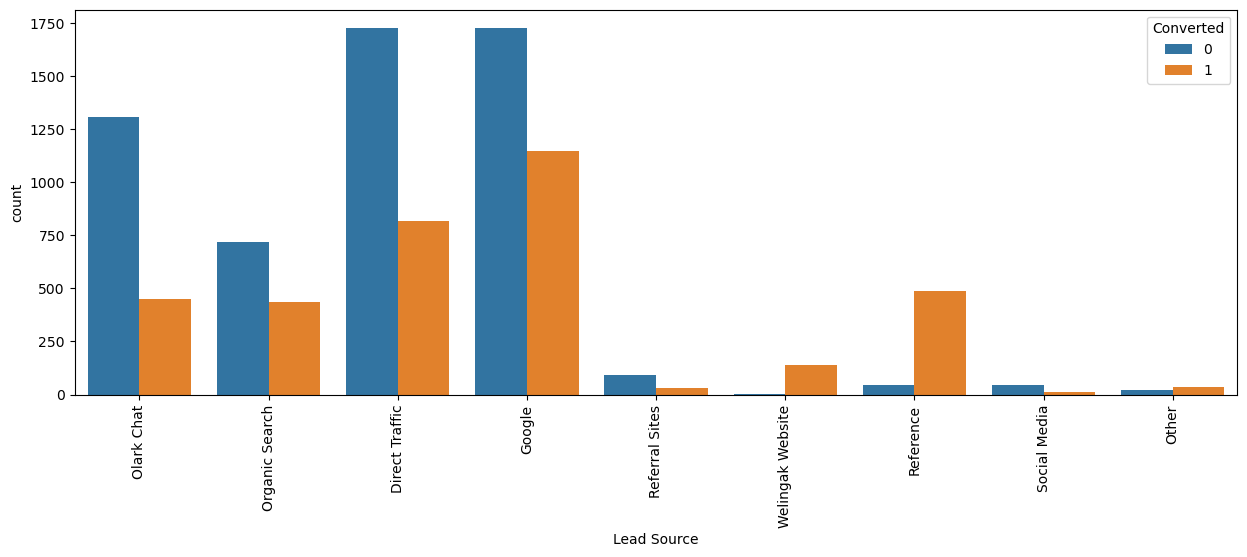

In [32]:
#Visualize in countplot
plt.figure(figsize=(15,5))
source = sns.countplot(x ='Lead Source', data = leads, hue=leads.Converted)
source.set_xticklabels(source.get_xticklabels(),rotation=90)
plt.show()

In [33]:
#Handle remaining categorical variables
cat_cols = leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'Occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [34]:
#Check value counts of all categorical columns
for c in cat_cols:
    print(leads[c].value_counts(),"\n")

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64 

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Other                 57
Name: Lead Source, dtype: int64 

No     8506
Yes     734
Name: Do Not Email, dtype: int64 

No     9238
Yes       2
Name: Do Not Call, dtype: int64 

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront     

In [35]:
#Drop columns with value imbalances (> 95% is of only one value)
leads.drop(['Do Not Call','Search','Magazine','Newspaper Article',
            'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
            'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
            'Get updates on DM Content','I agree to pay the amount through cheque'], 1, inplace = True)

#Get remaining categorical variables
cat_cols = leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'Occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [36]:
#Group values with low frequency

leads['Lead Origin'] = leads['Lead Origin'].replace('Quick Add Form', 'Lead Add Form')
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation',
                                                    'Approached upfront','View in browser link Clicked',
                                                    'Email Received','Email Marked Spam','Visited Booth in Tradeshow',
                                                    'Resubscribed to emails'],'Other')
leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'Business Administration','IT Projects Management',
                                                           'Supply Chain Management','Healthcare Management',
                                                           'Hospitality Management','Retail Management'],'Management')
leads['Specialization'] = leads['Specialization'].replace(['E-COMMERCE','E-Business','Rural and Agribusiness','Services Excellence'],'Other')
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable',
                                                                        'Had a Phone Conversation','Email Marked Spam', 
                                                                        'Approached upfront','Resubscribed to emails','View in browser link Clicked',
                                                                        'Form Submitted on Website','Email Received'], 'Other')

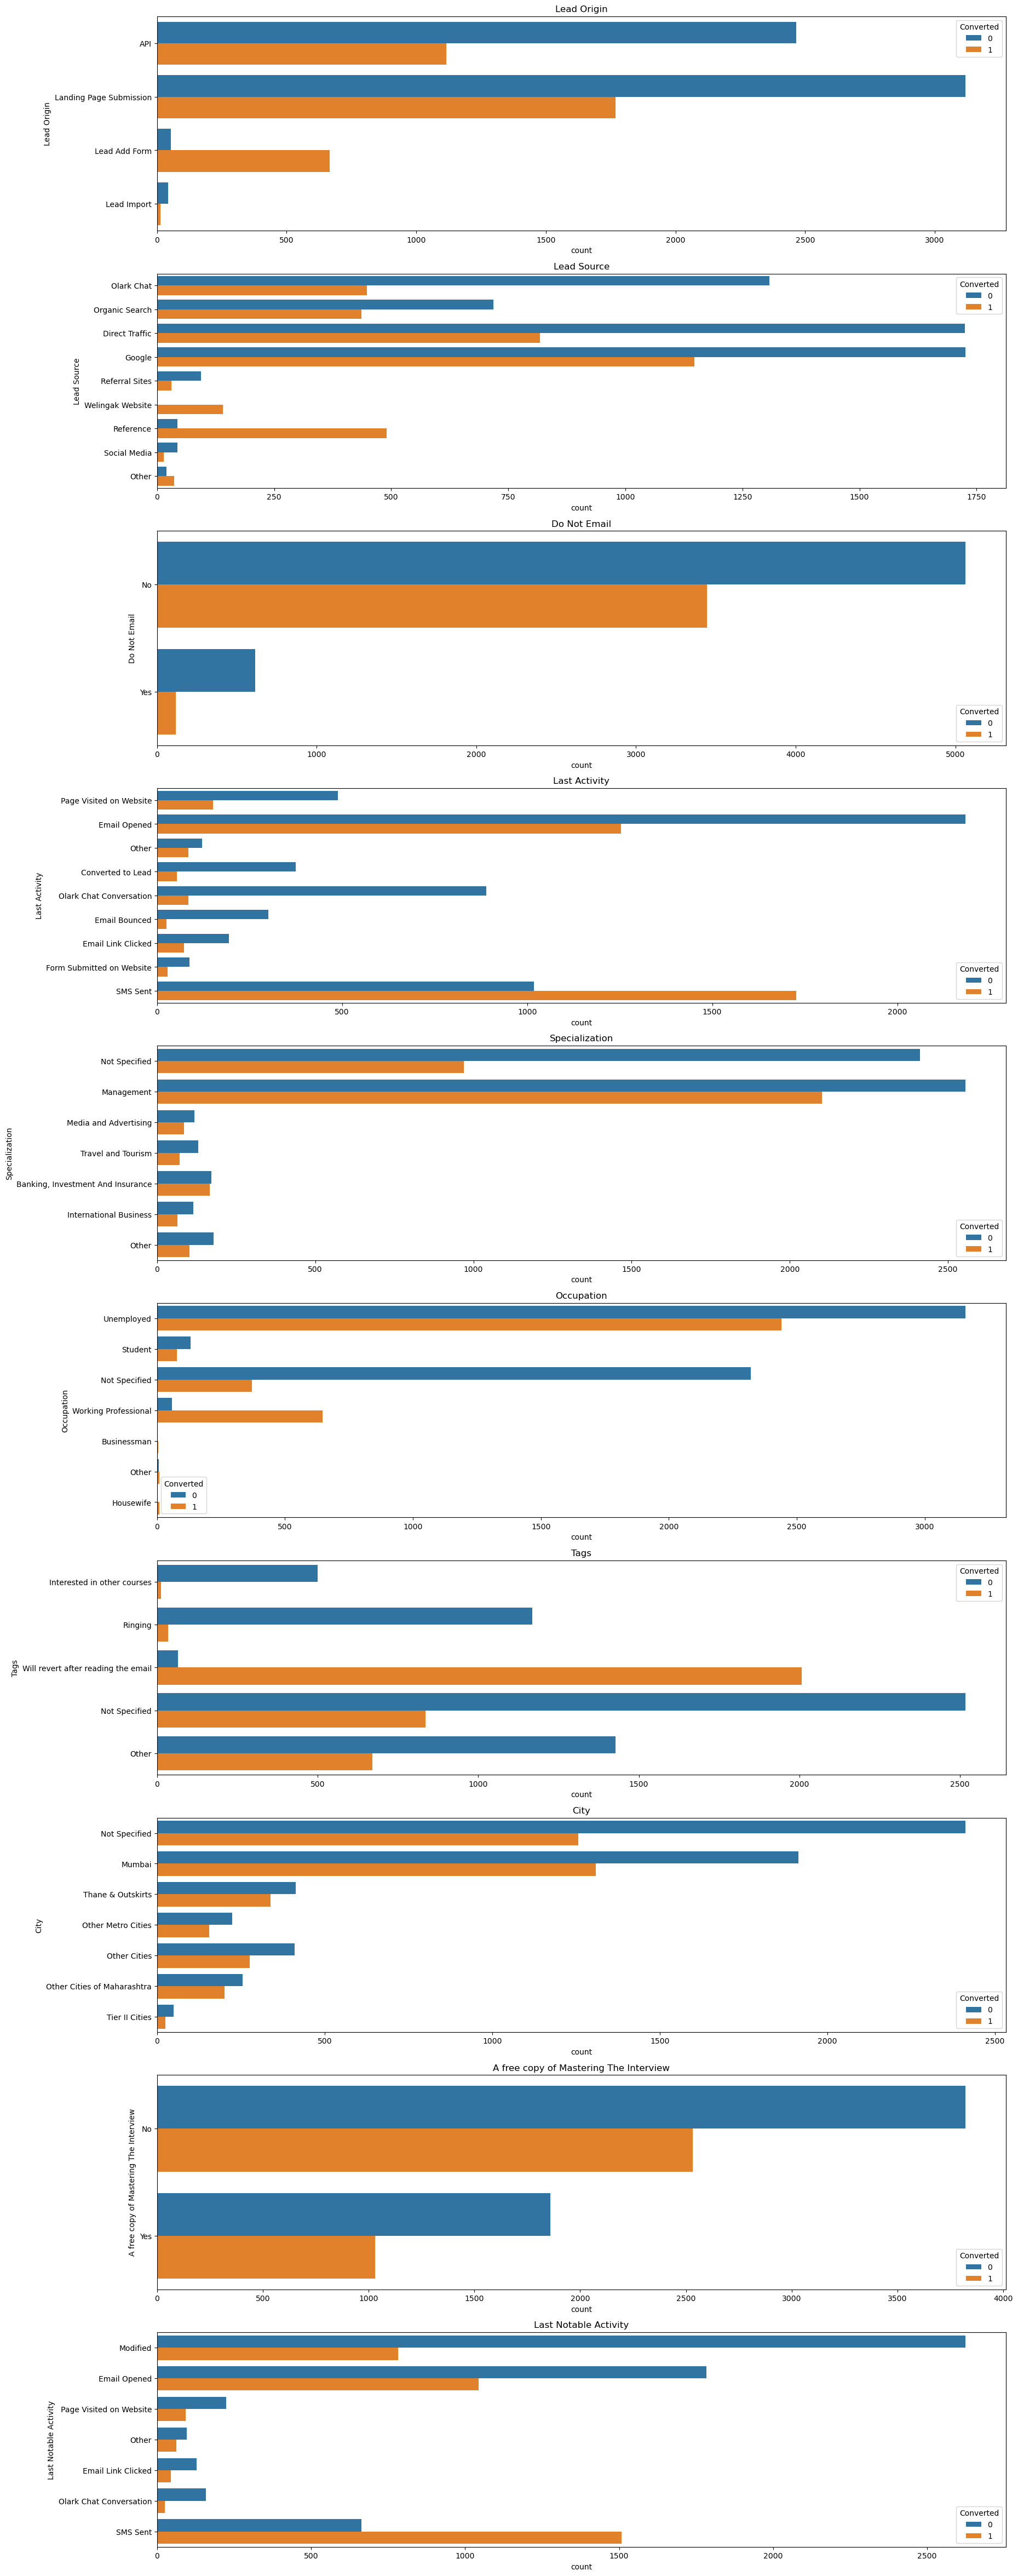

In [37]:
#Visualize in countplot
plt.figure(figsize = (20,60))
k=0
for c in cat_cols:
    k=k+1
    plt.subplot(len(cat_cols),1,k)
    countplot = sns.countplot(y = c, data = leads, hue=leads.Converted,orient="h")
    plt.title(c)
plt.show()

# 3, Numerical Variables Analysis

In [38]:
#Drop all remaining rows which have NaN Values (all are numerical variables)
#Since the number of Dropped rows is less than 2%, it will not affect the model
leads = leads.dropna()
leads.shape

(9103, 14)

In [39]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
Occupation                                0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [40]:
num_cols = leads.select_dtypes(include=['float','int']).columns
num_cols

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

In [41]:
num_vars = num_cols.drop('Converted')

In [42]:
#Check for outliers in variables
for c in num_vars:
    print(leads[c].describe(),"\n")

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64 

count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
25%         9.000000
50%       244.000000
75%       919.500000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64 

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64 



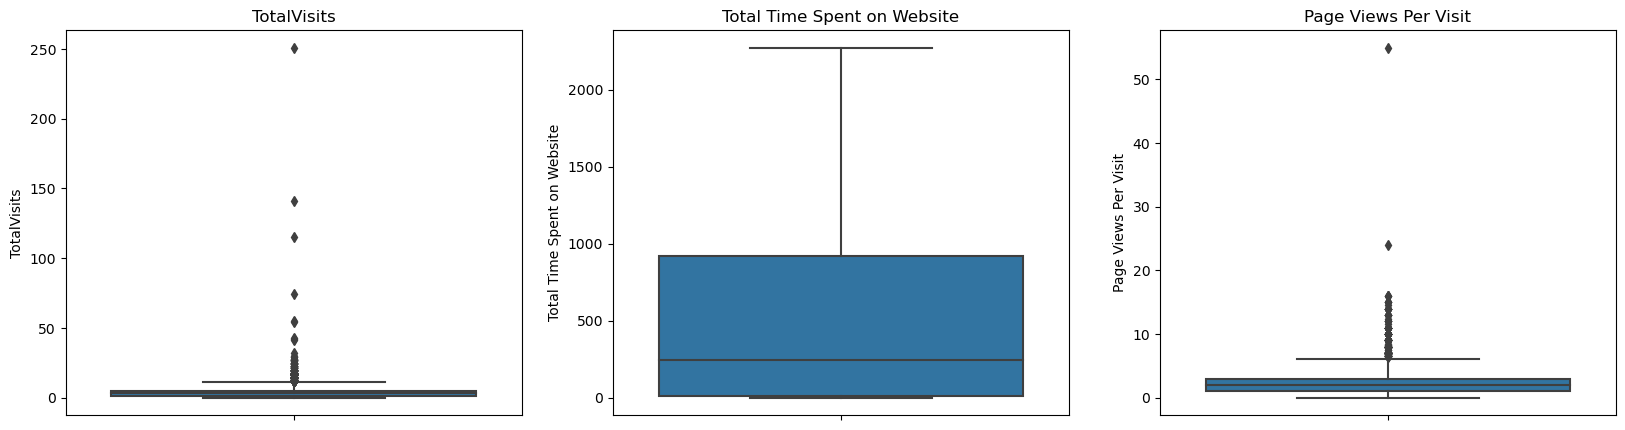

In [43]:
#Visualize in boxplot
plt.figure(figsize = (20,5))
j=0
for c in num_vars:
    j=j+1
    plt.subplot(1,3,j)
    boxplot = sns.boxplot(y = leads[c])
    plt.title(c)
plt.show()

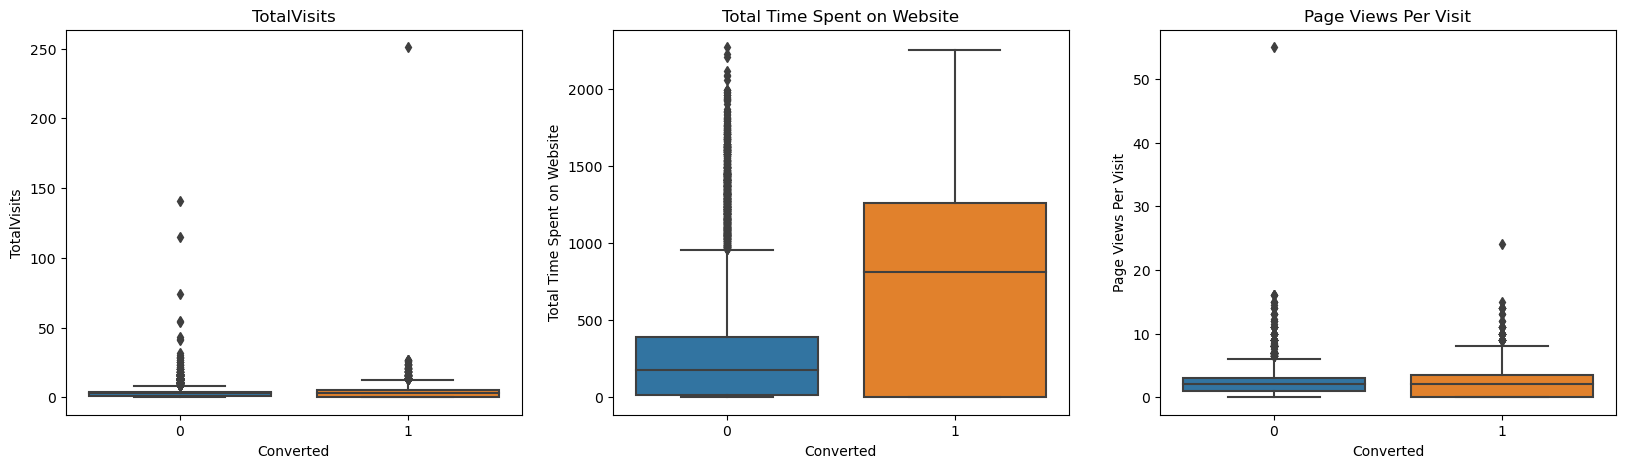

In [44]:
#Visualize in boxplot versus Converted
plt.figure(figsize = (20,5))
j=0
for c in num_vars:
    j=j+1
    plt.subplot(1,3,j)
    boxplot = sns.boxplot(y = leads[c],x=leads['Converted'])
    plt.title(c)
plt.show()

In [45]:
#Create outlier treatment function
def outlier_treatment(df,var):
    iqr = np.percentile(df[var], 75) - np.percentile(df[var], 25)
    outliers = df[var][(df[var] < np.percentile(df[var], 25) - 1.5 * iqr) | 
                      (df[var] > np.percentile(df[var], 75) + 1.5 * iqr)]
    df = df.drop(outliers.index, inplace = True)

In [46]:
#Drop outlier rows in TotalVisits
outlier_treatment(leads,'TotalVisits')

In [47]:
#Drop outlier rows in Page Views per Visit
outlier_treatment(leads,'Page Views Per Visit')

In [48]:
leads.shape

(8542, 14)

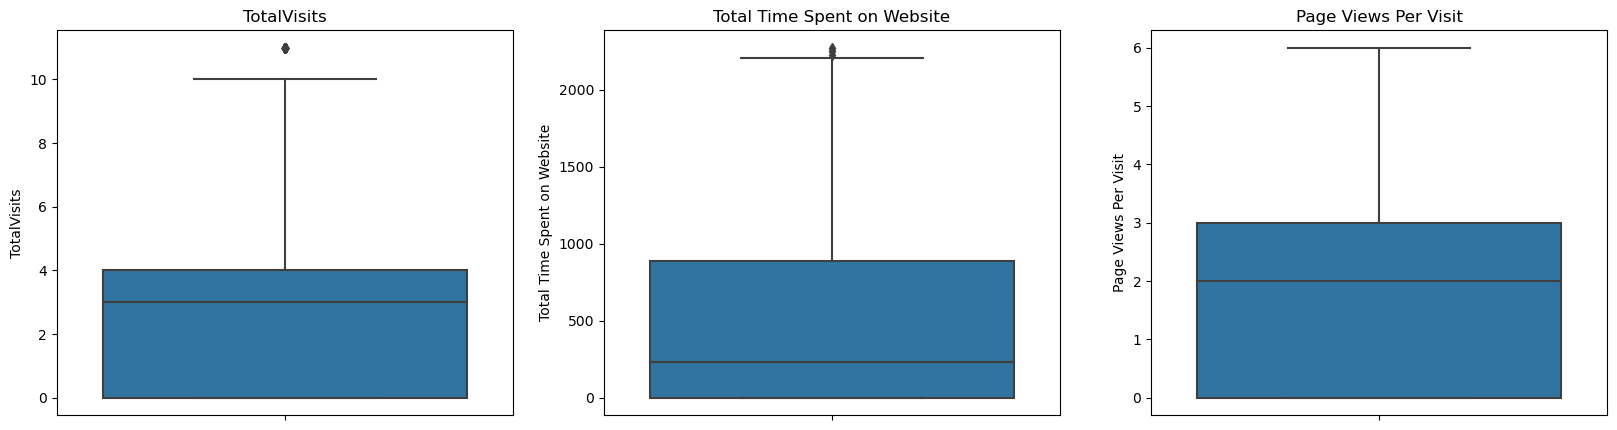

In [49]:
#Visualize again in boxplot
plt.figure(figsize = (20,5))
j=0
for c in num_vars:
    j=j+1
    plt.subplot(1,3,j)
    boxplot = sns.boxplot(y = leads[c])
    plt.title(c)
plt.show()

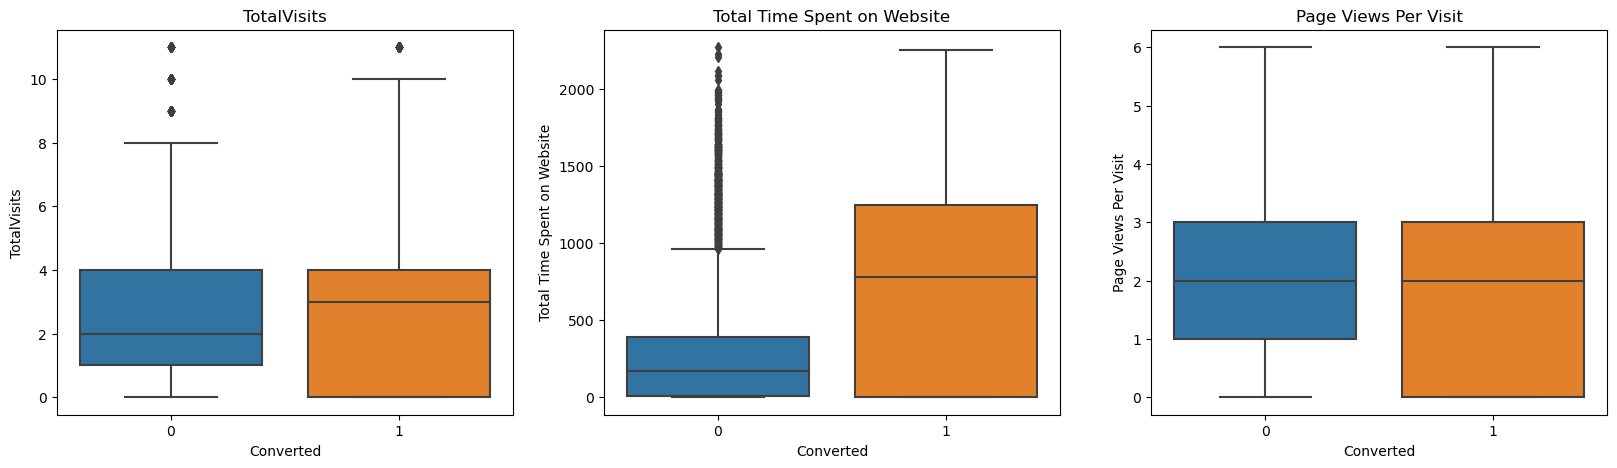

In [50]:
plt.figure(figsize = (20,5))
j=0
for c in num_vars:
    j=j+1
    plt.subplot(1,3,j)
    boxplot = sns.boxplot(y = leads[c],x=leads['Converted'])
    plt.title(c)
plt.show()

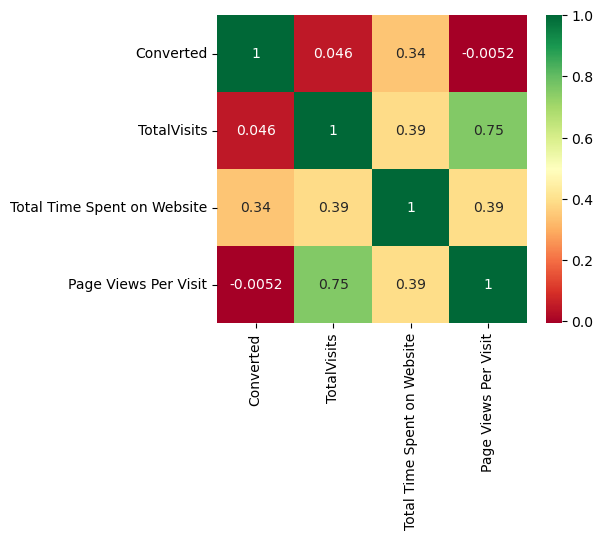

In [51]:
#Check correlations of numeric values using correlation heatmap
plt.figure(figsize=(5,4))
sns.heatmap(leads.corr(), cmap='RdYlGn', annot=True)
plt.show()

# Part B: Regression Model Building

# 1, Data Preparation

In [52]:
#Map Yes and No values to binary variables
mapping = {'Yes': 1, 'No': 0}
leads = leads.applymap(lambda x: mapping[x] if x in mapping else x)
leads[cat_cols]

,Lead Origin,Lead Source,Do Not Email,Last Activity,Specialization,Occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Not Specified,0,Modified
1,API,Organic Search,0,Email Opened,Not Specified,Unemployed,Ringing,Not Specified,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,Email Opened,Management,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,Other,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,0,Modified
...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,Other,Management,Unemployed,Will revert after reading the email,Mumbai,0,Other
9236,Landing Page Submission,Direct Traffic,0,SMS Sent,Media and Advertising,Unemployed,Other,Mumbai,1,SMS Sent
9237,Landing Page Submission,Direct Traffic,1,SMS Sent,Management,Unemployed,Other,Mumbai,1,SMS Sent
9238,Landing Page Submission,Google,0,SMS Sent,Management,Not Specified,Not Specified,Other Metro Cities,0,SMS Sent


In [53]:
#Create dummy variables for other columns
nonbinary_cols = cat_cols.drop(['Do Not Email','A free copy of Mastering The Interview'])
nonbinary_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'Occupation', 'Tags', 'City', 'Last Notable Activity'],
      dtype='object')

In [54]:
cols_w_Not_Specified = ['Occupation','Specialization', 'City','Tags']
remain_cols = nonbinary_cols.drop(cols_w_Not_Specified)
for c in cols_w_Not_Specified:
    dummy = pd.get_dummies(leads[c], prefix  = c)
    dummy = dummy.drop([c+'_Not Specified'], 1)
    leads = pd.concat([leads, dummy], axis = 1)

In [55]:
cols_w_Other = ['Lead Source','Last Activity','Last Notable Activity']
remain_cols = remain_cols.drop(cols_w_Other)
for c in cols_w_Other:
    dummy = pd.get_dummies(leads[c], prefix  = c)
    dummy = dummy.drop([c+'_Other'], 1)
    leads = pd.concat([leads, dummy], axis = 1)

In [56]:
for c in remain_cols:
    dummy = pd.get_dummies(leads[c], prefix  = c, drop_first=True)
    leads = pd.concat([leads, dummy], axis = 1)

In [57]:
leads.drop(nonbinary_cols, 1, inplace = True)
leads

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Occupation_Businessman,Occupation_Housewife,Occupation_Other,Occupation_Student,...,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
0,0,0,0.0,0,0.00,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.50,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.00,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
3,0,0,1.0,305,1.00,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,1,2.0,1428,1.00,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,1,8.0,1845,2.67,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9236,0,0,2.0,238,2.00,1,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
9237,1,0,2.0,199,2.00,1,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
9238,0,1,3.0,499,3.00,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0


In [58]:
#Train-Test Split
from sklearn.model_selection import train_test_split

y = leads['Converted']
X = leads.drop('Converted', axis=1)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [60]:
#Rows and columns after split
print(X_train.shape)
print(X_test.shape)

(5979, 52)
(2563, 52)


In [61]:
#Rescale the features by normalizing method
from sklearn.preprocessing import StandardScaler

#Instantiate an object
scaler = StandardScaler()

#Create a list of numeric variables
scaler_vars=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

#Fit on data
X_train[scaler_vars] = scaler.fit_transform(X_train[scaler_vars])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Occupation_Businessman,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,...,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
1384,0,0.886460,-0.337463,1.783827,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2019,0,-1.145025,-0.860893,-1.254234,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3514,0,-1.145025,-0.860893,-1.254234,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
5930,0,0.480163,0.301267,1.176215,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1409,0,-0.332431,-0.857232,-0.039010,1,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0


In [62]:
#Check numeric variables(min and max) after scaling
X_train.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Occupation_Businessman,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,...,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
count,5979.000000,5.979000e+03,5.979000e+03,5.979000e+03,5979.000000,5979.000000,5979.000000,5979.000000,5979.000000,5979.000000,...,5979.000000,5979.000000,5979.000000,5979.000000,5979.000000,5979.000000,5979.000000,5979.000000,5979.000000,5979.000000
mean,0.072922,3.981131e-17,4.515910e-17,-6.773865e-17,0.300719,0.000836,0.000502,0.001673,0.019903,0.602776,...,0.300217,0.017896,0.312929,0.366616,0.020405,0.028935,0.237331,0.520154,0.071249,0.003345
std,0.260030,1.000084e+00,1.000084e+00,1.000084e+00,0.458609,0.028908,0.022396,0.040866,0.139679,0.489364,...,0.458391,0.132584,0.463724,0.481921,0.141392,0.167637,0.425482,0.499635,0.257262,0.057744
min,0.000000,-1.145025e+00,-8.608927e-01,-1.254234e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-1.145025e+00,-8.608927e-01,-1.254234e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,7.386603e-02,-4.344625e-01,-3.900953e-02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,4.801632e-01,7.670456e-01,5.686026e-01,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,3.324243e+00,3.297259e+00,2.391439e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


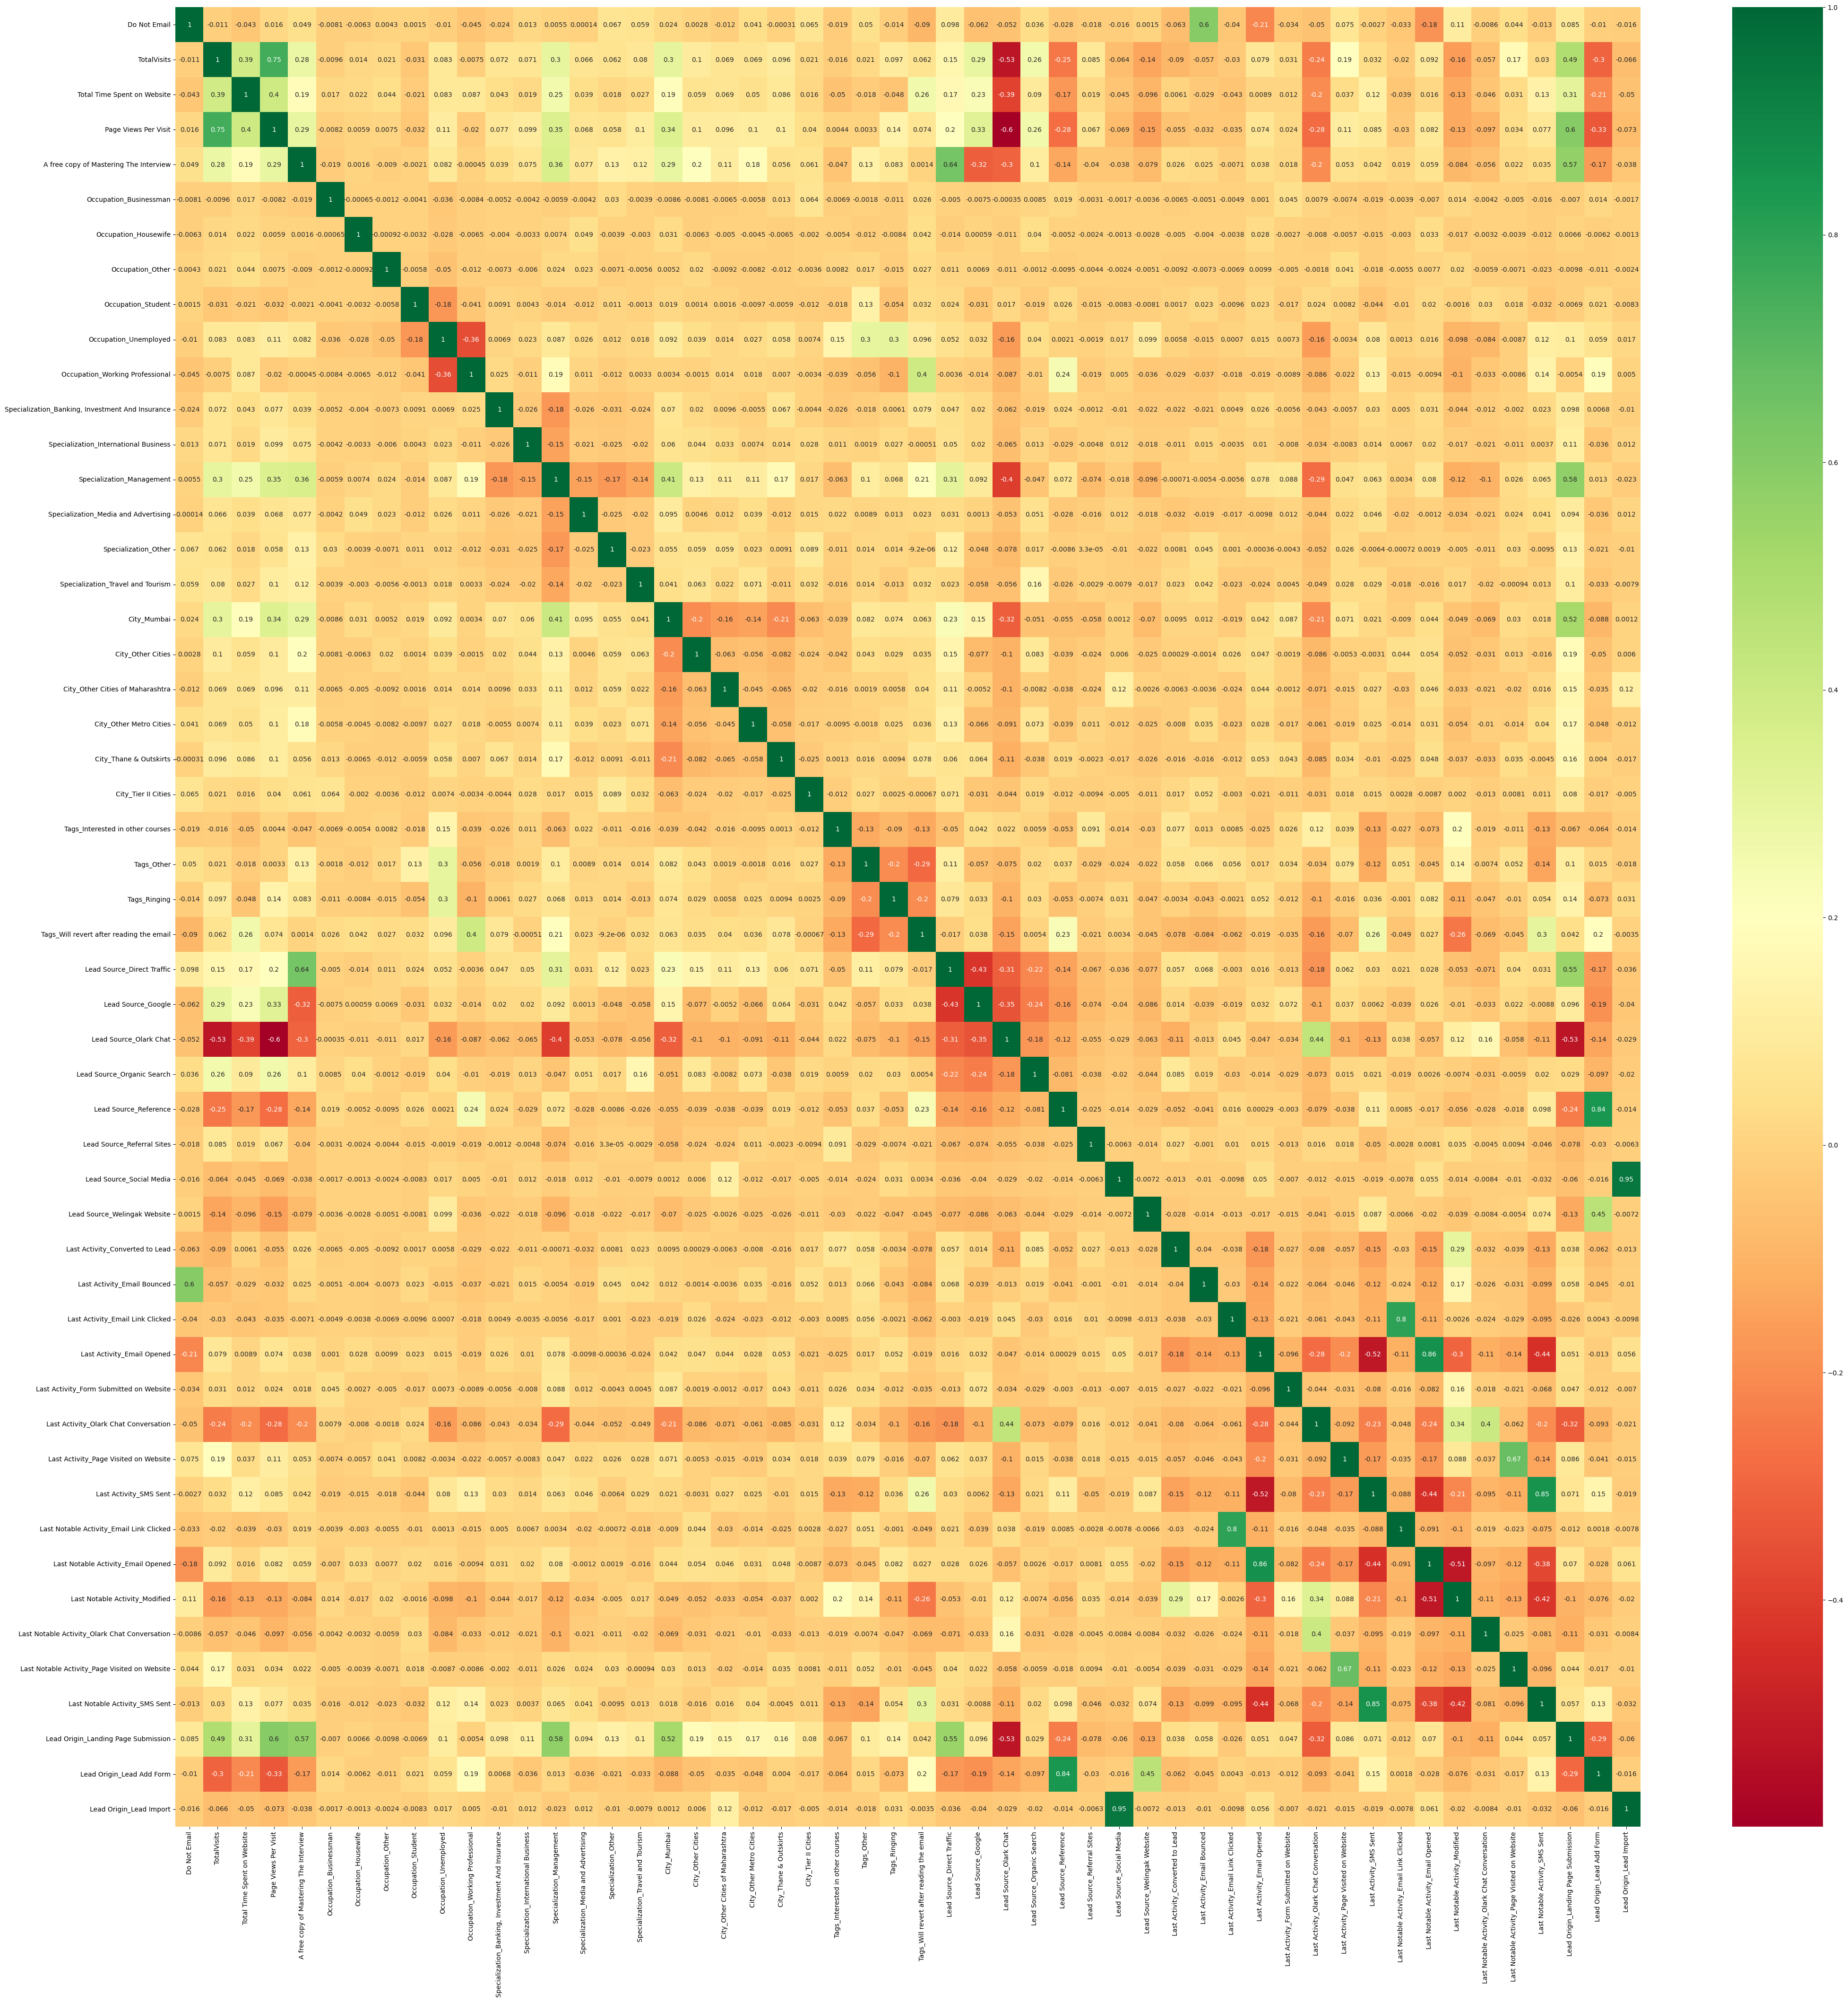

In [63]:
#Check the correlation coefficients to see which variables are highly correlated after scaling
plt.figure(figsize = (50,50))
sns.heatmap(X_train.corr(),cmap = 'RdYlGn',annot = True)
plt.show()

# 2, Model Training

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm 

In [65]:
#RFE
lm = LogisticRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)            
rfe = rfe.fit(X_train, y_train)

In [66]:
#List of variables selected
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 22),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 21),
 ('A free copy of Mastering The Interview', False, 34),
 ('Occupation_Businessman', False, 36),
 ('Occupation_Housewife', False, 12),
 ('Occupation_Other', False, 38),
 ('Occupation_Student', False, 3),
 ('Occupation_Unemployed', True, 1),
 ('Occupation_Working Professional', True, 1),
 ('Specialization_Banking, Investment And Insurance', False, 24),
 ('Specialization_International Business', False, 28),
 ('Specialization_Management', False, 26),
 ('Specialization_Media and Advertising', False, 30),
 ('Specialization_Other', False, 23),
 ('Specialization_Travel and Tourism', False, 29),
 ('City_Mumbai', False, 35),
 ('City_Other Cities', False, 32),
 ('City_Other Cities of Maharashtra', False, 19),
 ('City_Other Metro Cities', False, 31),
 ('City_Thane & Outskirts', False, 37),
 ('City_Tier II Cities', False, 33),
 ('Tags_Interested in other courses'

In [67]:
#Columns where RFE support is True
rfe_true = X_train.columns[rfe.support_]
rfe_true

Index(['Do Not Email', 'Total Time Spent on Website', 'Occupation_Unemployed',
       'Occupation_Working Professional', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Lead Origin_Lead Add Form'],
      dtype='object')

In [68]:
#Create X_test dataframe with RFE selected variables
X_train_rfe = X_train[rfe_true]
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5979 entries, 1384 to 6120
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              5979 non-null   int64  
 1   Total Time Spent on Website               5979 non-null   float64
 2   Occupation_Unemployed                     5979 non-null   uint8  
 3   Occupation_Working Professional           5979 non-null   uint8  
 4   Tags_Interested in other courses          5979 non-null   uint8  
 5   Tags_Ringing                              5979 non-null   uint8  
 6   Tags_Will revert after reading the email  5979 non-null   uint8  
 7   Lead Source_Olark Chat                    5979 non-null   uint8  
 8   Lead Source_Reference                     5979 non-null   uint8  
 9   Lead Source_Welingak Website              5979 non-null   uint8  
 10  Last Activity_Converted to Lead  

In [69]:
#Create function to run the model
def model(X_train_current):
    # Add a constant variable
    X_train_with_const = sm.add_constant(X_train_current)
    # Run the linear model
    lm = sm.GLM(y_train,X_train_with_const,family = sm.families.Binomial()).fit()
    print(lm.summary())

In [70]:
#Create function to check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_check(X_train_current):
    vif = pd.DataFrame()
    X = X_train_current
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [71]:
#Build model using selected RFE variables
model(X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5963
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1516.9
Date:                Sun, 15 Oct 2023   Deviance:                       3033.9
Time:                        17:14:56   Pearson chi2:                 7.96e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5613
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [72]:
vif_check(X_train_rfe)

                                    Features    VIF
14                 Lead Origin_Lead Add Form  16.89
8                      Lead Source_Reference  12.99
9               Lead Source_Welingak Website   4.61
2                      Occupation_Unemployed   2.61
6   Tags_Will revert after reading the email   2.16
7                     Lead Source_Olark Chat   1.70
0                               Do Not Email   1.68
11               Last Activity_Email Bounced   1.64
3            Occupation_Working Professional   1.55
13            Last Notable Activity_SMS Sent   1.52
5                               Tags_Ringing   1.48
1                Total Time Spent on Website   1.42
12     Last Activity_Olark Chat Conversation   1.42
4           Tags_Interested in other courses   1.20
10           Last Activity_Converted to Lead   1.06


In [73]:
#Drop variable Lead Source_Lead Add Form due to high VIF
X_train_1 = X_train_rfe.drop(['Lead Origin_Lead Add Form'], axis = 1)

In [74]:
#Build Model 1
model(X_train_1)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5964
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1523.8
Date:                Sun, 15 Oct 2023   Deviance:                       3047.6
Time:                        17:14:57   Pearson chi2:                 8.02e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5603
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [75]:
vif_check(X_train_1)

                                    Features   VIF
2                      Occupation_Unemployed  2.60
6   Tags_Will revert after reading the email  2.14
7                     Lead Source_Olark Chat  1.70
0                               Do Not Email  1.67
11               Last Activity_Email Bounced  1.63
3            Occupation_Working Professional  1.55
13            Last Notable Activity_SMS Sent  1.52
5                               Tags_Ringing  1.47
12     Last Activity_Olark Chat Conversation  1.42
1                Total Time Spent on Website  1.40
8                      Lead Source_Reference  1.28
4           Tags_Interested in other courses  1.20
9               Lead Source_Welingak Website  1.09
10           Last Activity_Converted to Lead  1.06


In [76]:
X_train_with_const = sm.add_constant(X_train_1)
X_train_with_const

,const,Do Not Email,Total Time Spent on Website,Occupation_Unemployed,Occupation_Working Professional,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent
1384,1.0,0,-0.337463,0,0,0,0,0,0,0,0,0,0,0,0
2019,1.0,0,-0.860893,0,0,0,0,1,0,1,0,0,0,0,0
3514,1.0,0,-0.860893,1,0,0,0,1,1,0,0,0,0,0,1
5930,1.0,0,0.301267,1,0,0,0,0,0,0,0,0,0,1,0
1409,1.0,0,-0.857232,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,1.0,0,-0.860893,0,0,0,0,0,1,0,0,0,0,0,0
89,1.0,0,1.124844,1,0,1,0,0,0,0,0,1,0,0,0
8708,1.0,0,-0.262426,1,0,0,0,0,0,0,0,0,0,0,0
7510,1.0,0,-0.434463,1,0,0,1,0,0,0,0,0,0,0,1


In [77]:
#Get y_train_pred for residual analysis
lm = sm.GLM(y_train,X_train_with_const,family = sm.families.Binomial()).fit()
y_train_pred = lm.predict(X_train_with_const)

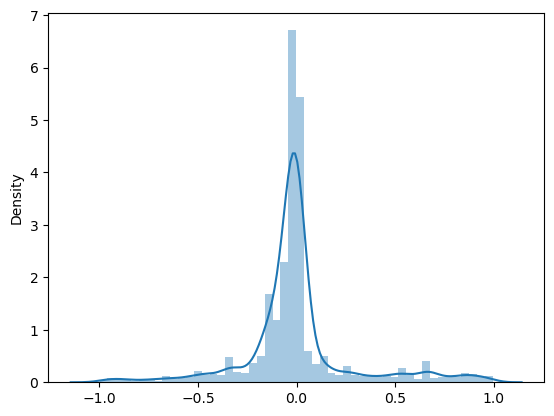

In [78]:
#Get distribution of the error terms
res = y_train - y_train_pred

#Distribution should be centered around 0 and should be a normal distribution
sns.distplot(res)
plt.show()

In [79]:
# Gett the Predicted values on the train set
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final

,Converted,Converted_prob,Prospect ID
1384,0,0.062257,1384
2019,1,0.989285,2019
3514,1,0.992318,3514
5930,0,0.079098,5930
1409,0,0.102958,1409
...,...,...,...
399,0,0.140257,399
89,0,0.011175,89
8708,0,0.179505,8708
7510,0,0.023534,7510


In [80]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final

,Converted,Converted_prob,Prospect ID,Predicted
1384,0,0.062257,1384,0
2019,1,0.989285,2019,1
3514,1,0.992318,3514,1
5930,0,0.079098,5930,0
1409,0,0.102958,1409,0
...,...,...,...,...
399,0,0.140257,399,0
89,0,0.011175,89,0
8708,0,0.179505,8708,0
7510,0,0.023534,7510,0


In [81]:
from sklearn import metrics

#Get Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3477  210]
 [ 447 1845]]


In [82]:
#Calculate overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8901154039136979


In [83]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [84]:
print('Sensitivity: ', TP / float(TP + FN))
print('Specificity: ', TN / float(TN + FP))
print('False positive rate: ', FP/ float(TN + FP))
print('Positive predictive value: ', TP / float(TP + FP))
print('Negative predictive value: ', TN / float(TN + FN))

Sensitivity:  0.8049738219895288
Specificity:  0.9430431244914564
False positive rate:  0.05695687550854353
Positive predictive value:  0.8978102189781022
Negative predictive value:  0.886085626911315


# 3, Model evaluation

In [85]:
#Plot ROC curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [86]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

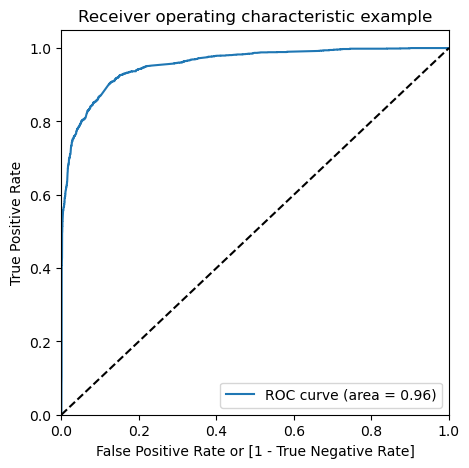

In [87]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [88]:
#Find optimal cutoff point
#Create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1384,0,0.062257,1384,0,1,0,0,0,0,0,0,0,0,0
2019,1,0.989285,2019,1,1,1,1,1,1,1,1,1,1,1
3514,1,0.992318,3514,1,1,1,1,1,1,1,1,1,1,1
5930,0,0.079098,5930,0,1,0,0,0,0,0,0,0,0,0
1409,0,0.102958,1409,0,1,1,0,0,0,0,0,0,0,0


In [89]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  
    cutoff_df.loc[i] =[ i ,accuracy, sensi, speci]

print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383342  1.000000  0.000000
0.1   0.1  0.771032  0.972077  0.646054
0.2   0.2  0.867871  0.934119  0.826688
0.3   0.3  0.883927  0.909250  0.868186
0.4   0.4  0.891119  0.851658  0.915650
0.5   0.5  0.890115  0.804974  0.943043
0.6   0.6  0.889446  0.775742  0.960130
0.7   0.7  0.884931  0.743455  0.972878
0.8   0.8  0.869543  0.690663  0.980743
0.9   0.9  0.843118  0.607766  0.989422


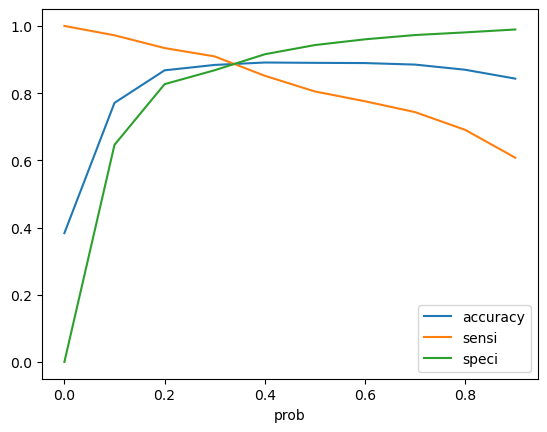

In [90]:
#Plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line( x = 'prob', y = ['accuracy','sensi','speci'])
plt.show()

In [91]:
#From ROC curve, 0.3 is the optimum point to take it as a cutoff probability.
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
1384,0,0.062257,1384,0,1,0,0,0,0,0,0,0,0,0,0
2019,1,0.989285,2019,1,1,1,1,1,1,1,1,1,1,1,1
3514,1,0.992318,3514,1,1,1,1,1,1,1,1,1,1,1,1
5930,0,0.079098,5930,0,1,0,0,0,0,0,0,0,0,0,0
1409,0,0.102958,1409,0,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0,0.140257,399,0,1,1,0,0,0,0,0,0,0,0,0
89,0,0.011175,89,0,1,0,0,0,0,0,0,0,0,0,0
8708,0,0.179505,8708,0,1,1,0,0,0,0,0,0,0,0,0
7510,0,0.023534,7510,0,1,0,0,0,0,0,0,0,0,0,0


In [92]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map(lambda x: round(x*100))
y_train_pred_final

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,Lead_Score
1384,0,0.062257,1384,0,1,0,0,0,0,0,0,0,0,0,0,6
2019,1,0.989285,2019,1,1,1,1,1,1,1,1,1,1,1,1,99
3514,1,0.992318,3514,1,1,1,1,1,1,1,1,1,1,1,1,99
5930,0,0.079098,5930,0,1,0,0,0,0,0,0,0,0,0,0,8
1409,0,0.102958,1409,0,1,1,0,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0,0.140257,399,0,1,1,0,0,0,0,0,0,0,0,0,14
89,0,0.011175,89,0,1,0,0,0,0,0,0,0,0,0,0,1
8708,0,0.179505,8708,0,1,1,0,0,0,0,0,0,0,0,0,18
7510,0,0.023534,7510,0,1,0,0,0,0,0,0,0,0,0,0,2


In [93]:
#Check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8901154039136979

In [94]:
#Get Confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)
confusion2

array([[3201,  486],
       [ 208, 2084]])

In [95]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [96]:
print('Sensitivity: ',TP / float(TP + FN))
print('Specificity: ',TN / float(TN + FP))
print('False positive rate: ',FP/ float(TN + FP))
print('Positive predictive value: ',TP / float(TP + FP))
print('Negative predictive value: ',TN / float(TN + FN))

Sensitivity:  0.9092495636998255
Specificity:  0.8681855166802278
False positive rate:  0.13181448331977216
Positive predictive value:  0.8108949416342413
Negative predictive value:  0.9389850396010561


In [97]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [98]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8108949416342413

In [99]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9092495636998255

In [100]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

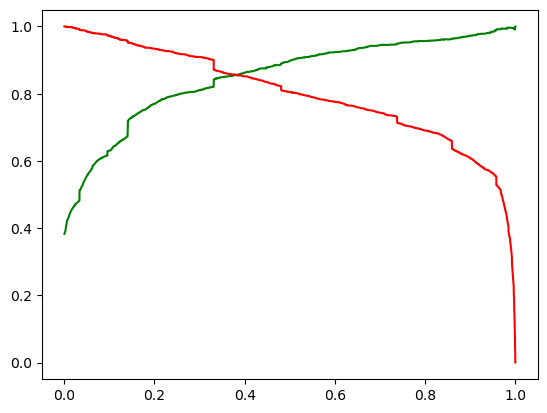

In [101]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# 4, Prediction on test set

In [102]:
scaler_vars

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [103]:
#Normalize numerical variables on test set
X_test[scaler_vars] = scaler.transform(X_test[scaler_vars])
X_test.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Occupation_Businessman,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,...,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
count,2563.000000,2563.000000,2563.000000,2563.000000,2563.000000,2563.0,2563.000000,2563.000000,2563.000000,2563.000000,...,2563.000000,2563.000000,2563.000000,2563.000000,2563.000000,2563.000000,2563.000000,2563.000000,2563.000000,2563.000000
mean,0.087788,-0.010152,-0.003722,0.025135,0.301210,0.0,0.002341,0.000780,0.030823,0.595396,...,0.306282,0.021069,0.298478,0.362856,0.020679,0.028872,0.245806,0.523995,0.069060,0.003902
std,0.283041,0.964726,0.978201,1.016414,0.458873,0.0,0.048337,0.027929,0.172872,0.490911,...,0.461038,0.143643,0.457680,0.480918,0.142335,0.167481,0.430648,0.499521,0.253605,0.062354
min,0.000000,-1.145025,-0.860893,-1.254234,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.738728,-0.857232,-0.646622,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.073866,-0.434463,-0.039010,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.480163,0.758810,0.568603,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,3.324243,3.055676,2.391439,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [104]:
X_train_1.columns

Index(['Do Not Email', 'Total Time Spent on Website', 'Occupation_Unemployed',
       'Occupation_Working Professional', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [105]:
#Get test columns
X_test_1 = X_test[X_train_1.columns]

In [106]:
#Add constant variable to X_test_1
X_test_with_const = sm.add_constant(X_test_1)
X_test_with_const

,const,Do Not Email,Total Time Spent on Website,Occupation_Unemployed,Occupation_Working Professional,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent
7191,1.0,0,1.165108,0,1,0,1,0,0,0,0,0,0,0,0
1008,1.0,0,-0.582706,1,0,0,0,0,0,0,0,0,0,0,0
3494,1.0,0,1.203542,0,0,0,0,1,0,0,0,0,0,0,1
3298,1.0,0,0.021250,1,0,0,0,1,0,0,0,0,0,0,1
5646,1.0,0,-0.860893,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,1.0,0,-0.407010,0,0,1,0,0,0,0,0,0,0,1,0
5729,1.0,0,0.416568,1,0,0,0,1,0,0,0,0,0,0,1
6750,1.0,0,-0.860893,0,0,0,0,0,1,0,0,0,0,0,0
7923,1.0,0,0.709395,1,0,0,0,0,0,0,0,1,0,0,0


In [107]:
#Predict on test set using selected model
y_test_pred = lm.predict(X_test_with_const)
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1

,0
7191,0.082064
1008,0.133883
3494,0.989253
3298,0.987273
5646,0.859279
...,...
464,0.000614
5729,0.991673
6750,0.140257
7923,0.133214


In [108]:
y_test_df = pd.DataFrame(y_test)
y_test_df

,Converted
7191,0
1008,1
3494,1
3298,1
5646,1
...,...
464,0
5729,1
6750,0
7923,0


In [109]:
#Put Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index
y_test_df

,Converted,Prospect ID
7191,0,7191
1008,1,1008
3494,1,3494
3298,1,3298
5646,1,5646
...,...,...
464,0,464
5729,1,5729
6750,0,6750
7923,0,7923


In [110]:
#Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop = True, inplace = True)
y_test_df.reset_index(drop = True, inplace = True)

#Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final

,Converted,Prospect ID,0
0,0,7191,0.082064
1,1,1008,0.133883
2,1,3494,0.989253
3,1,3298,0.987273
4,1,5646,0.859279
...,...,...,...
2558,0,464,0.000614
2559,1,5729,0.991673
2560,0,6750,0.140257
2561,0,7923,0.133214


In [111]:
#Rename column '0'
y_pred_final = y_pred_final.rename(columns = { 0 : 'Converted_prob'})
y_pred_final

,Converted,Prospect ID,Converted_prob
0,0,7191,0.082064
1,1,1008,0.133883
2,1,3494,0.989253
3,1,3298,0.987273
4,1,5646,0.859279
...,...,...,...
2558,0,464,0.000614
2559,1,5729,0.991673
2560,0,6750,0.140257
2561,0,7923,0.133214


In [112]:
#Rearrange columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7191,0,0.082064,8
1,1008,1,0.133883,13
2,3494,1,0.989253,99
3,3298,1,0.987273,99
4,5646,1,0.859279,86
...,...,...,...,...
2558,464,0,0.000614,0
2559,5729,1,0.991673,99
2560,6750,0,0.140257,14
2561,7923,0,0.133214,13


In [113]:
#Apply optimal cutoff threshold
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7191,0,0.082064,8,0
1,1008,1,0.133883,13,0
2,3494,1,0.989253,99,1
3,3298,1,0.987273,99,1
4,5646,1,0.859279,86,1
...,...,...,...,...,...
2558,464,0,0.000614,0,0
2559,5729,1,0.991673,99,1
2560,6750,0,0.140257,14,0
2561,7923,0,0.133214,13,0


In [114]:
#Calculate overall accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8852906749902458

In [115]:
#Get Confusion matrix 
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted)
confusion3

array([[1430,  193],
       [ 101,  839]])

In [116]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [117]:
print('Sensitivity: ', TP / float(TP + FN))
print('Specificity: ', TN / float(TN + FP))
print('False positive rate: ', FP/ float(TN + FP))
print('Positive predictive value: ', TP / float(TP + FP))
print('Negative predictive value: ', TN / float(TN + FN))

Sensitivity:  0.8925531914893617
Specificity:  0.8810844115834874
False positive rate:  0.11891558841651263
Positive predictive value:  0.812984496124031
Negative predictive value:  0.9340300457217505


In [118]:
#Calculate Precision score
precision_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.812984496124031

In [119]:
#Calculate Recall score
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8925531914893617